# Twitter keyword analysis

In [1]:
import pandas as pd
from analysis.functions.datamanip import *

raw = pd.read_csv('found_seeds.tweets.csv')

# changing date to more readable format
raw['created_at'] = pd.to_datetime(raw['created_at'])

# getting seperated date and time columns
raw['date'] = raw['created_at'].dt.date
raw['time'] = raw['created_at'].dt.time
raw['hour'] = raw['created_at'].dt.hour

# changing na to None
raw = raw.fillna('None')

# only 4 samples that have no sentiment
raw = raw[raw['sentiment'] != 'None']

raw['ogtext'] = raw['cleantext']

raw.head()

,created_at,sentiment,statefips,countyfips,cleantext,social distancing,social distance,socially distance,physical distance,physical distancing,...,virtual,online,screen,disposable,barriers,exposure,date,time,hour,ogtext
0,2020-02-10 07:03:44+00:00,POSITIVE,32.0,3.0,have mocha avoid coronavirus airport,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:03:44,7,have mocha avoid coronavirus airport
1,2020-02-10 07:04:49+00:00,POSITIVE,36.0,81.0,heart beat china,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:04:49,7,heart beat china
2,2020-02-10 07:05:30+00:00,POSITIVE,4.0,13.0,people stop sister street fun wearing mask s a...,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:05:30,7,people stop sister street fun wearing mask s a...
3,2020-02-10 07:10:48+00:00,NEGATIVE,5.0,119.0,coronavirus death toll surpass number fatal...,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:10:48,7,coronavirus death toll surpass number fatal...
4,2020-02-10 07:11:11+00:00,NEGATIVE,5.0,119.0,coronavirus case aboard japanese cruise shi...,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:11:11,7,coronavirus case aboard japanese cruise shi...


# looking at tweets directly

In [4]:
negs = raw[raw['sentiment'] == 'NEGATIVE']
test = negs[negs['test'] == 1]

for text in test['cleantext']:
    print(text)
    print('---------------------------')

esting
---------------------------
   albany co resident die easter sunday amp covid19 s bring total covid connect death care stay home mccoy reiterate testing today shut high wind
---------------------------
george stephanopoulos test positive covid hasn t symptom
---------------------------
protest terrorist mi va states ur worry abt covid 19 ur family ther wthout social distancing facemask good luck
---------------------------
trump appear undermine guideline reopen america encouraging protest state stay home order penny doesn t mind
---------------------------
entire town bolinas 1680 ppl test covid 19 sfs mission district
---------------------------
know somebody get corona amp say test hurt like shitthey tick nose amp minute
---------------------------
hank claim virus test virus temperature check pre requisite movie deal real people real world suffer eat cat food caviar
---------------------------
st relative test covid 19 announce today 4 29 cheyenne river sioux tribe despite g

# creating proportion charts for top keywords found in tweets

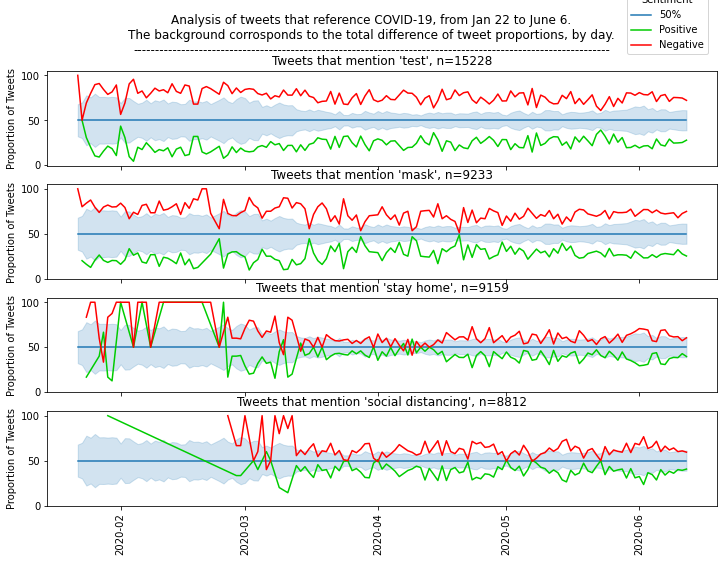

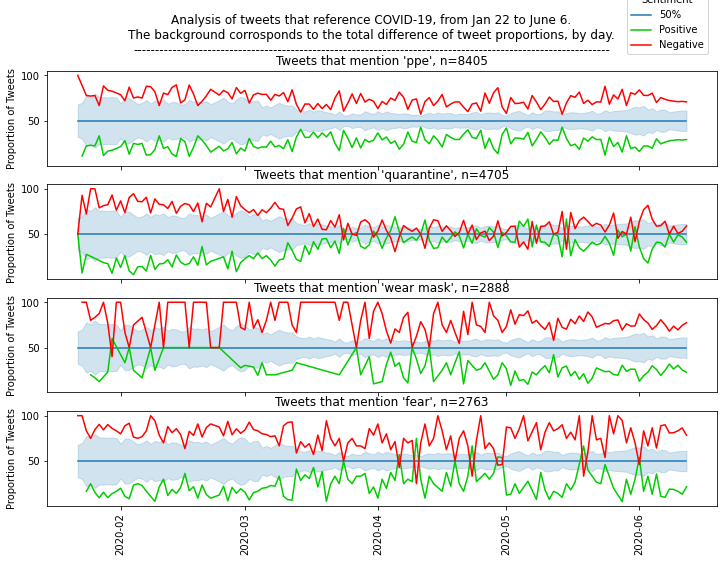

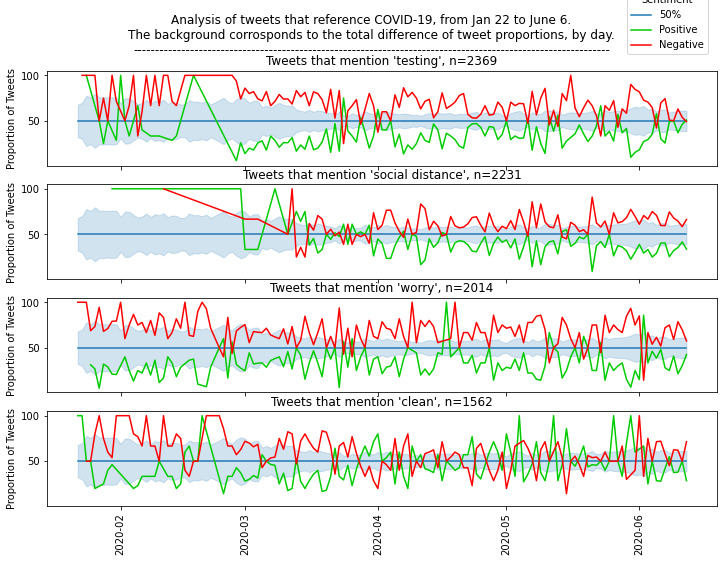

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

phrases = [['test', "mask", "stay home", "social distancing"], ['ppe', "quarantine", "wear mask", "fear"], ['testing', "social distance", "worry", "clean"]]
phrasedf = raw
phrasedf['date'] = pd.to_datetime(phrasedf['date'])
rawntweetdf, rawpropdf = ntweet_prop_dfs(raw, 'date', 'sentiment')

dates = pd.period_range(raw['date'].min(), raw['date'].max(), freq='D')

# plotting ##########

# do fill bar graphs
for phraselist in phrases:
    fig, ax = plt.subplots(nrows=len(phraselist), ncols=1, figsize=(12, 8), sharex= True, sharey=True)
    fig.suptitle('Analysis of tweets that reference COVID-19, from Jan 22 to June 6.\nThe background corrosponds to the total difference of tweet proportions, by day.\n-------------------------------------------------------------------------------------------------------------')

    for i, phrase in enumerate(phraselist):
        pcol = phrase
        # pcol = f'in.{pcol}'

        ntweets = len(phrasedf[phrasedf[pcol] == 1].index)

        ntweetdf, propdf = ntweet_prop_dfs(phrasedf[phrasedf[pcol] == 1], 'date', 'sentiment')

        # base plot
        base = sns.lineplot(data= rawpropdf, x= 'date', y="proportion", ax= ax[i], legend=False)
        ax[i].set(ylabel='Proportion of Tweets')
        
        # trying to give linebreaks for missing dates
        pos = propdf[propdf['sentiment'] == 'POSITIVE']

        overlay = sns.lineplot(data= propdf[propdf['sentiment'] == "POSITIVE"], x= 'date', y="proportion", palette= ['#00cc00'], hue='sentiment', ax= ax[i], legend=False)

        overlay = sns.lineplot(data= propdf[propdf['sentiment'] == "NEGATIVE"], x= 'date', y="proportion", palette= ['#ff0000'], hue='sentiment', ax= ax[i], legend=False).set_title(f"Tweets that mention '{phrase}', n={ntweets}")
        ax[i].set(ylabel='Proportion of Tweets')


    # plot shared x axis
    plot = plt.xlabel("")
    plot = plt.xticks(rotation=90)
    fig.legend([0,1,2], labels=["50%", "Positive", "Negative"], bbox_to_anchor=(0.825,1.0), loc=1, title="Sentiment")

# tweet counts for top keywords

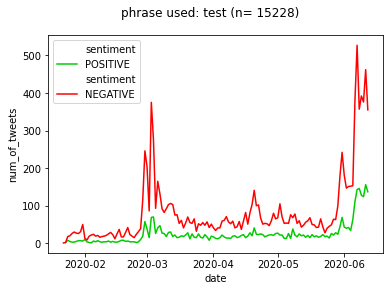

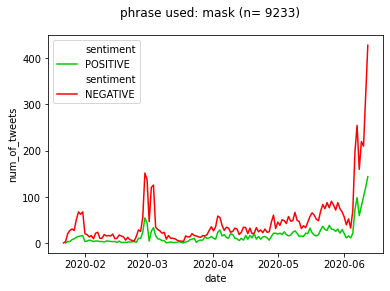

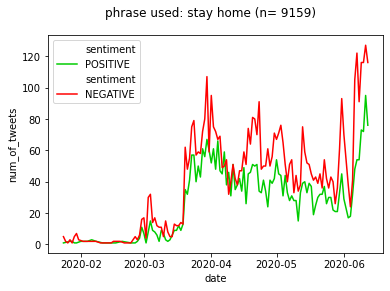

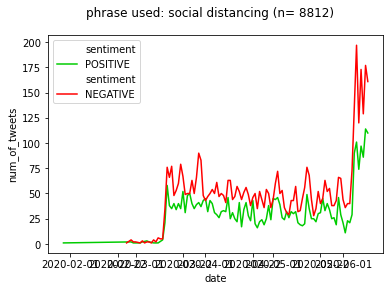

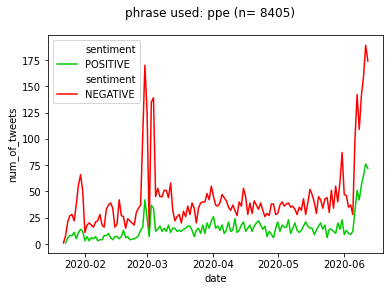

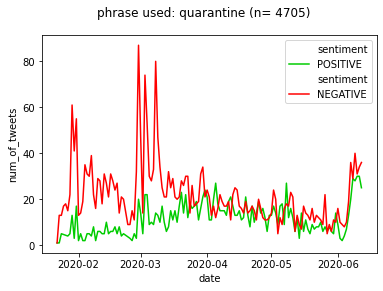

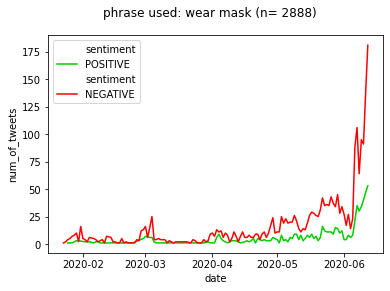

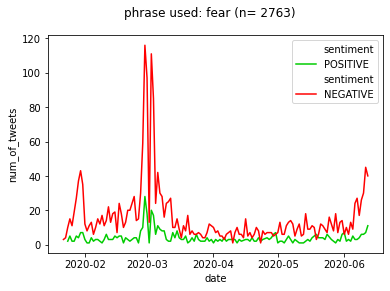

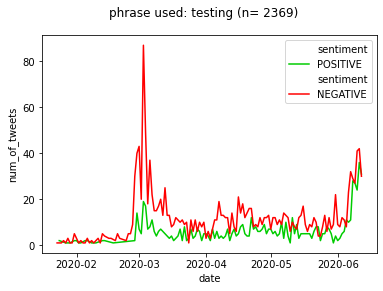

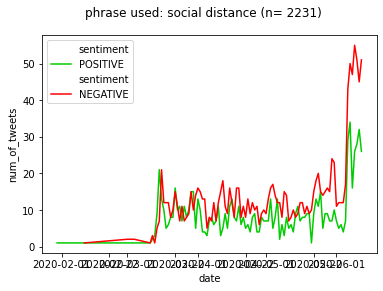

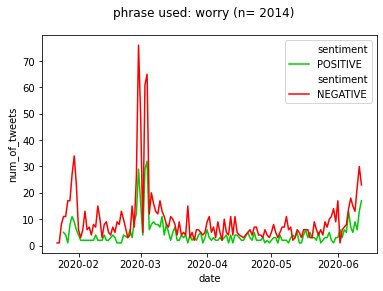

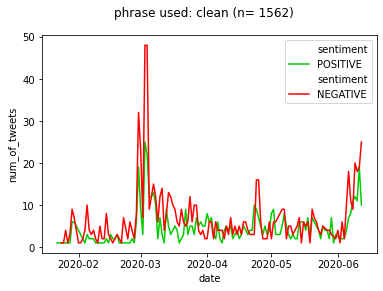

In [25]:
phraselist = ['test', "mask", "stay home", "social distancing", 'ppe', "quarantine", "wear mask", "fear", 'testing', "social distance", "worry", "clean"]

for phrase in phraselist:
    data = raw[raw[phrase] == 1]
    ntweetdf, propdf = ntweet_prop_dfs(data, 'date', 'sentiment')

    posN = ntweetdf[ntweetdf['sentiment'] == 'POSITIVE']

    plot = sns.lineplot(data= posN, x= 'date', y="num_of_tweets", hue= 'sentiment', palette= ['#00cc00'])

    negN = ntweetdf[ntweetdf['sentiment'] == 'NEGATIVE']

    plot = sns.lineplot(data= negN, x= 'date', y="num_of_tweets", hue= 'sentiment', palette= ['#ff0000'])

    plt.suptitle(f'phrase used: {phrase} (n= {posN["num_of_tweets"].sum() + negN["num_of_tweets"].sum()})')

    plt.show()